### Assignment
1. Determine the five most common journals and the total articles for each. 
2. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal. 

- You will need to do considerable data cleaning in order to extract accurate estimates. 

3. For a real bonus round, identify the open access prices paid by subject area.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
file_name = "C:/Users/boyerm/Documents/Thinkful/WELLCOME_APCspend2013_forThinkful.csv"

In [3]:
# Need to change the encoding for the csv to avoid errors from the GBP sign (£)
fixed_df = pd.read_csv(file_name, sep=',', encoding='latin1')

In [4]:
# Did it work?!
fixed_df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [5]:
# I need to remove the GBP sign to do some calcs (remove £)
fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'] = fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'].str.replace('£', ' ')

In [6]:
fixed_df.head(200)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1294.78


In [7]:
# Yuck, I saw some $ around row 180! Better remove those too:
fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'] = fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'].str.replace('$', '')

In [8]:
# I think I'm good now, we'll see.
fixed_df.head(200)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1294.78


In [9]:
# Top Journals? Well, I noticed that the names of them are inconsistent, maybe some trailing spaces, case, etc
# Better do more cleaning

# Fix trailing spaces
fixed_df['Journal title'] = fixed_df['Journal title'].str.strip()

# Fix capitilzation
fixed_df['Journal title'] = fixed_df['Journal title'].str.title()

# Remove special characters, periods (.) and (&)
fixed_df['Journal title'] = fixed_df['Journal title'].str.replace('.', ' ')
fixed_df['Journal title'] = fixed_df['Journal title'].str.replace('&', ' ')

In [10]:
# OK - these should be the top journals now!
top_journals = fixed_df.groupby('Journal title').count()['Article title'].sort_values(ascending=False).head(5)
print(top_journals)

Journal title
Plos One                           190
Journal Of Biological Chemistry     53
Neuroimage                          29
Nucleic Acids Research              26
Plos Pathogens                      24
Name: Article title, dtype: int64


In [11]:
# calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

print(fixed_df.dtypes)



PMID/PMCID                                             object
Publisher                                              object
Journal title                                          object
Article title                                          object
COST (£) charged to Wellcome (inc VAT when charged)    object
dtype: object


In [12]:
# The charge columnn is 'object', so I need to update that to float

fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'] = fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'].astype(float)


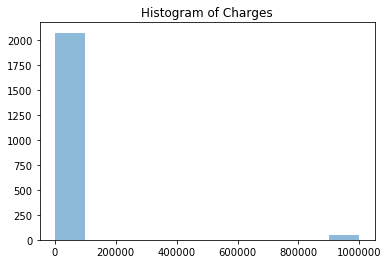

In [13]:
# Now, before I get the mean, I want to look at my data

plt.hist(fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'], label = 'Charge', alpha = 0.5)
plt.title('Histogram of Charges')
plt.show()


In [14]:
#Uh oh, there are definitely some outliers.  

# I wonder what the mean is!
fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'].mean()

24067.33997179131

2863.73


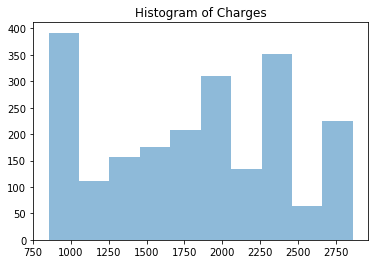

In [15]:
#I'll replace those with the winzor method:

import scipy.stats
import numpy as np
fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'] = scipy.stats.mstats.winsorize(fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'], limits=0.1)
# I chose 0.1 because when I did 0.05, there were still some outliers

max1 =  fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'].max()

# check to see if I removed those outliers
print(max1)

# new histogram
plt.hist(fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'], label = 'Charge', alpha = 0.5)
plt.title('Histogram of Charges')
plt.show()

In [16]:
# Now, what's the mean?
fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'].mean()


1814.6491161259996

In [17]:
# Wow  - that made a big difference :); was 24K, NOW less than 2K

In [18]:
# Median & SD
med = fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'].median()
std = fixed_df['COST (£) charged to Wellcome (inc VAT when charged)'].std()

print(med)
print(std)

1884.01
628.9865608785458


In [19]:
by_journal = fixed_df.groupby('Journal title').sum()['COST (£) charged to Wellcome (inc VAT when charged)'].sort_values(ascending=False)
print(by_journal)

Journal title
Plos One                                                               197606.77
Journal Of Biological Chemistry                                         77476.66
Neuroimage                                                              64239.88
Nature Communications                                                   49536.89
Plos Genetics                                                           41875.90
Plos Pathogens                                                          40330.53
Human Molecular Genetics                                                39602.48
Plos Neglected Tropical Diseases                                        31270.38
Developmental Cell                                                      30533.30
Brain                                                                   30320.00
Nucleic Acids Research                                                  30016.00
Movement Disorders                                                      29491.55
Current Biolog